In [90]:
from nupack import *
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [91]:
#We use a DNA model.
model = nupack.Model(material="DNA")

In [92]:
def generate_dna_sequence(min, max):
    """
    randomly generates a DNA sequence of a random length between min and max

    Parameters:
    min (int): minimum length of the sequence
    max (int): maximum length of the sequence

    Returns:
    string: randomly generated dna sequence
    """
    length = random.randint(min,max)
    return ''.join(random.choice('ACGT') for _ in range(length))

In [102]:
with open('data_5M.pkl', 'rb') as file:
    data_5M = pickle.load(file)

In [110]:
def generate_data(total=250000, min=10, max=50, file_name="data", dataset_to_compare_with=None):
    """
    Generates a dataset of randomly generated DNA sequences of random length between 10 and 50.
    Only DNA sequences with non-zero MFE and not in the dataset_to_compare_with are considered.

    Parameters:
    total (int): Total number of sequences to generate
    min (int): Minimum sequence length
    max (int): Maximum sequence length
    file_name (string): Name of the file to save the dataset to.
    dataset_to_compare_with (3-tuples list) Parent dataset to compare with. DNA sequences included in this dataset will be ignored.

    Creates a .pkl file
    """
    data=[]
    while len(data)!=250000:
        seq = generate_dna_sequence(min,max+1)
        output = nupack.mfe(seq, model)
        mfe = output[0][1]
        structure = str(output[0][0])
    
        if mfe==0:
            continue

        if dataset_to_compare_with is not None: 
            if (seq,mfe,structure) not in data and (seq,mfe,structure) not in dataset_to_compare_with:
                data.append((seq, mfe, structure))
        else:
            if (seq,mfe,structure) not in data:
                data.append((seq, mfe, structure))
            
    with open(f'{data}.pkl', 'wb') as file:
        pickle.dump(data, file)
        print(f"Created {file_name}.pkl")

In [111]:
def generate_test_data(min=10, max=50, min_per_length=100,file_name="dummy_test", dataset_to_compare_with=None):
    """
    Specifically for test data
    
    Parameters:
    min (int): Minimum sequence length
    max (int): Maximum sequence length
    min_per_length (int): Minimum number of sequences per length
    file_name (string): Name of the file to save the dataset to.
    dataset_to_compare_with (3-tuples list of the form (sequence, mfe, structure)) 
        Parent dataset to compare with. DNA sequences included in this dataset will be ignored.

    Creates a .pkl file
    """
    data=[]
    n=0
    for k in range(min,max+1):
        while n != min_per_length:
            seq = generate_dna_sequence(k,k)
            output = nupack.mfe(seq, model)
            mfe = output[0][1]
            structure = str(output[0][0])
            
            if mfe == 0:
                continue

            if dataset_to_compare_with is not None:
                if (seq,mfe,structure) not in data and (seq,mfe,structure) not in dataset_to_compare_with:
                    data.append((seq, mfe, structure))
                    n+=1
            else:
                if (seq,mfe,structure) not in data:
                    data.append((seq, mfe, structure))
                    n+=1
        n=0
    with open(f'{file_name}.pkl', 'wb') as file:
        pickle.dump(data, file)
        print(f"Created {file_name}.pkl")

In [112]:
def count_hairpins(data):
    """
    Counts the number of hairpins of sequences in data

    Parameters:
    data (3-tuples list of DNA sequences): 3-Tuple data of the form (sequence, mfe, structure)

    Returns:
    new_data (4-tuples list of DNA sequences): 4-Tuple data of the form (sequence, mfe, structure, number_of_hairpins)
    """
    hairpins = []
    start_checking = False
    start_checking2 = False
    for _, _, struct in data:
        len_hairpin = 0
        hairpin = []
        for i in range(len(struct)):
            if start_checking2:
                if struct[i]=="(":
                    start_checking2=False
                    len_hairpin = 0
                elif struct[i]==")":
                    hairpin.append(len_hairpin)
                    len_hairpin = 0
                    start_checking2=False
                    start_checking=False
            if start_checking:
                if struct[i]==".":
                    len_hairpin += 1
                    start_checking2=True
            if struct[i]=="(":
                start_checking=True


        hairpins.append(hairpin)

    num_hairpins = []
    for s in hairpins:
        num_hairpins.append(len(s))
            
    new_data = [(sq, mfe, struct, num_hairpins[i]) for i, (sq, mfe, struct) in enumerate(data)]
    
    return new_data


In [113]:
generate_test_data()

Created dummy_test.pkl


In [115]:
with open('data_test.pkl', 'rb') as file:
    data = pickle.load(file)

In [54]:
mfes = [abs(mfe) for _, mfe, _, _ in data]
hairpins = [h for _,_,_,h in data]
len_seq = [len(s) for s,_,_,_ in data]

mfes_10 = [mfes[index] for index, num in enumerate(len_seq) if num == 10]
mfes_20 = [mfes[index] for index, num in enumerate(len_seq) if num == 20]
mfes_30 = [mfes[index] for index, num in enumerate(len_seq) if num == 30]
mfes_40 = [mfes[index] for index, num in enumerate(len_seq) if num == 40]
mfes_50 = [mfes[index] for index, num in enumerate(len_seq) if num == 50]

print(np.mean(mfes_10))
print(np.mean(mfes_20))
print(np.mean(mfes_30))
print(np.mean(mfes_40))
print(np.mean(mfes_50))

0.8105459270477295
1.6434123497009276
2.4420000755786897
3.549870872735977
4.649324255943299


In [55]:
#data_5M_priming = count_hairpins(data_5M_priming)

mfes = [abs(mfe) for _, mfe, _, _ in data]
hairpins = [h for _,_,_,h in data]
len_seq = [len(s) for s,_,_,_ in data]

mfes_10 = [mfes[index] for index, num in enumerate(len_seq) if num == 60]
mfes_20 = [mfes[index] for index, num in enumerate(len_seq) if num == 70]
mfes_30 = [mfes[index] for index, num in enumerate(len_seq) if num == 80]
mfes_40 = [mfes[index] for index, num in enumerate(len_seq) if num == 90]
mfes_50 = [mfes[index] for index, num in enumerate(len_seq) if num == 100]

print(np.mean(mfes_10))
print(np.mean(mfes_20))
print(np.mean(mfes_30))
print(np.mean(mfes_40))
print(np.mean(mfes_50))

5.94733152294159
7.046075609207153
8.237986602306366
9.384192662715911
10.670402856349945


In [56]:
def count_paires(s):
    counter=0
    for token in s:
        if token == '(':
            counter+=1
    return counter
            

In [81]:
paires = []
for _,_,s,_ in data:
    paires.append(count_paires(s))
paires_set = set(paires)
paires_unique = range(1,len(paires_set)+1)
paires_unique = list(paires_unique)

In [82]:
total=[]
for k in range(len(paires_set)):
    try:
        total.append(mean([mfes[index] for index, p in enumerate(paires) if p == k]))
    except:
        total.append(0)


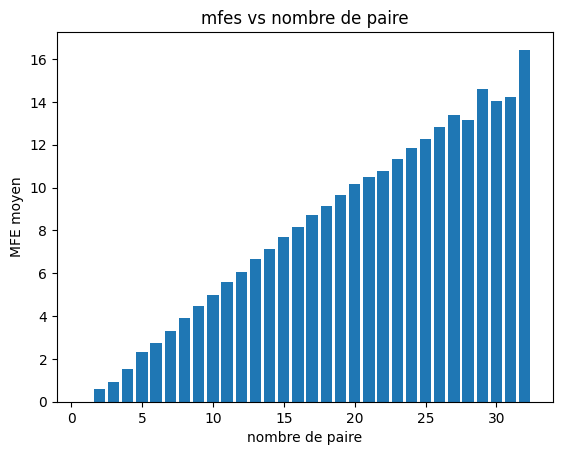

In [83]:
plt.bar(paires_unique, total)

plt.xlabel('nombre de paire')
plt.ylabel('MFE moyen')
plt.title('mfes vs nombre de paire')

plt.show()


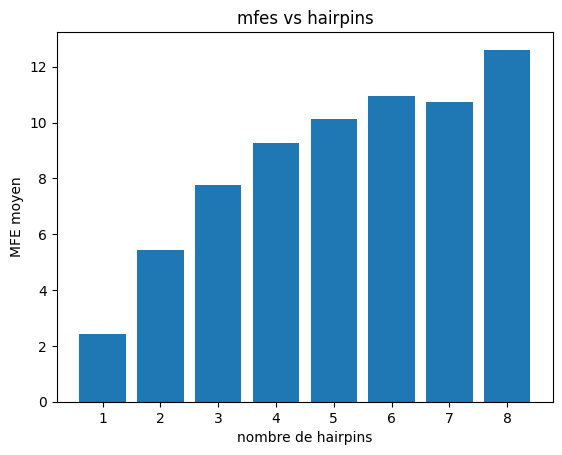

In [84]:
#avg_0 = [mfes[index] for index, h in enumerate(hairpins) if h == 0]
mfes = [abs(mfe) for _, mfe, _, _ in data]
hairpins = [h for _,_,_,h in data]

avg_1 = [mfes[index] for index, h in enumerate(hairpins) if h == 1]
avg_2 = [mfes[index] for index, h in enumerate(hairpins) if h == 2]
avg_3 = [mfes[index] for index, h in enumerate(hairpins) if h == 3]
avg_4 = [mfes[index] for index, h in enumerate(hairpins) if h == 4]
avg_5 = [mfes[index] for index, h in enumerate(hairpins) if h == 5]
avg_6 = [mfes[index] for index, h in enumerate(hairpins) if h == 6]
avg_7 = [mfes[index] for index, h in enumerate(hairpins) if h == 7]
avg_8 = [mfes[index] for index, h in enumerate(hairpins) if h == 8]

#avg_0 = mean(avg_0)
avg_1 = mean(avg_1)
avg_2 = mean(avg_2)
avg_3 = mean(avg_3)
avg_4 = mean(avg_4)
avg_5 = mean(avg_5)
avg_6 = mean(avg_6)
avg_7 = mean(avg_7)
avg_8 = mean(avg_8)

avg = [avg_1, avg_2, avg_3, avg_4, avg_5, avg_6, avg_7, avg_8]
h = [1,2,3,4,5,6,7,8]

avg_set = set(avg)

plt.bar(h, avg)

plt.xlabel('nombre de hairpins')
plt.ylabel('MFE moyen')
plt.title('mfes vs hairpins')

plt.show()


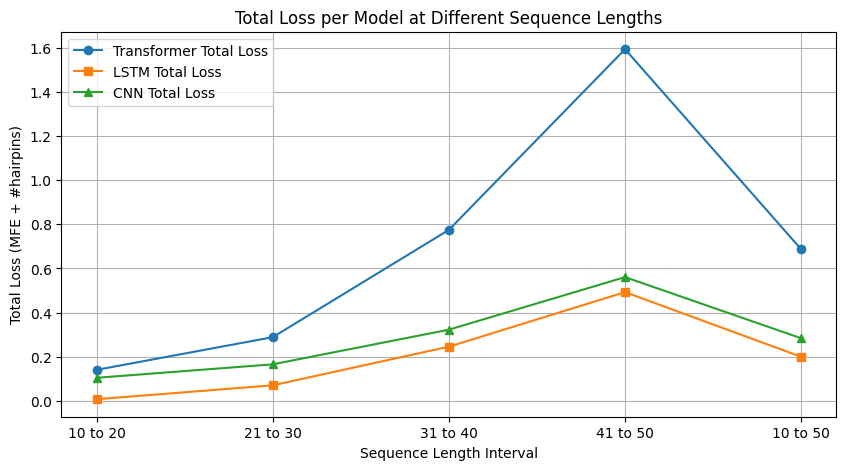

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table provided
sequence_intervals = ['10 to 20', '21 to 30', '31 to 40', '41 to 50', '10 to 50']

# Transformer data
transformer_mfe = np.array([0.132, 0.205, 0.563, 1.220, 0.521])
transformer_hairpins = np.array([0.009, 0.084, 0.212, 0.373, 0.166])
transformer_acc = np.array([0.979, 0.926, 0.881, 0.838, 0.888])

# LSTM data
lstm_mfe = np.array([0.006, 0.045, 0.160, 0.317, 0.129])
lstm_hairpins = np.array([0.002, 0.026, 0.086, 0.176, 0.071])
lstm_acc = np.array([0.989, 0.954, 0.914, 0.873, 0.917])

# CNN data
cnn_mfe = np.array([0.105, 0.166, 0.323, 0.561, 0.284])
cnn_hairpins = np.array([0, 0, 0, 0, 0])  # Assuming no hairpins for CNN
cnn_acc = np.array([0, 0, 0, 0, 0])       # Assuming no accuracy data for CNN

# Calculate total loss for each model
transformer_total_loss = transformer_mfe + transformer_hairpins
lstm_total_loss = lstm_mfe + lstm_hairpins
cnn_total_loss = cnn_mfe + cnn_hairpins

# Plotting total loss for each model
plt.figure(figsize=(10, 5))
plt.plot(sequence_intervals, transformer_total_loss, '-o', label='Transformer Total Loss')
plt.plot(sequence_intervals, lstm_total_loss, '-s', label='LSTM Total Loss')
plt.plot(sequence_intervals, cnn_total_loss, '-^', label='CNN Total Loss')
plt.title('Total Loss per Model at Different Sequence Lengths')
plt.xlabel('Sequence Length Interval')
plt.ylabel('Total Loss (MFE + #hairpins)')
plt.legend()
plt.grid(True)
plt.show()



In [157]:
mfes = [abs(mfe) for _, mfe, _, _ in data]
hairpins = [h for _,_,_,h in data]
len_seq = [len(s) for s,_,_,_ in data]

mfes_1020 = [mfes[index] for index, num in enumerate(len_seq) if num>= 10 and num<=20]
mfes_2130 = [mfes[index] for index, num in enumerate(len_seq) if num > 20 and num <=30]
mfes_3140 = [mfes[index] for index, num in enumerate(len_seq) if num >30 and num <=40]
mfes_4150 = [mfes[index] for index, num in enumerate(len_seq) if num > 40 and num <=50]

print(np.mean(mfes_1020))
print(np.mean(mfes_2130))
print(np.mean(mfes_3140))
print(np.mean(mfes_4150))
print(np.mean(mfes))

1.270031066677787
2.05364569940567
2.979800201821327
4.059029316377639
5.40247105041703


In [158]:
mfes = [abs(mfe) for _, mfe, _, _ in data]
hairpins = [h for _,_,_,h in data]
len_seq = [len(s) for s,_,_,_ in data]

h_1020 = [hairpins[index] for index, num in enumerate(len_seq) if num>= 10 and num<=20]
h_2130 = [hairpins[index] for index, num in enumerate(len_seq) if num > 20 and num <=30]
h_3140 = [hairpins[index] for index, num in enumerate(len_seq) if num >30 and num <=40]
h_4150 = [hairpins[index] for index, num in enumerate(len_seq) if num > 40 and num <=50]

print(np.mean(h_1020))
print(np.mean(h_2130))
print(np.mean(h_3140))
print(np.mean(h_4150))
print(np.mean(hairpins))

1.0163636363636364
1.1472
1.413
1.7626
2.163032967032967
